# MMDM. Task 1. Belov Alexander

$$
J(u) = \int_{0}^{1} L(u, u') \, dx = \int_{0}^{1} (u')^2 - 2 e^u \, dx \rightarrow \min_{u}
$$
$$
u(0) = u(1) = 0
$$

Euler-Lagrange equation:
$$
\frac{\partial L}{\partial u} - \frac{d}{dx} \frac{\partial L}{\partial u'} = - 2e^u -2u''  = 0 \iff u'' = -e^u
$$
Shooting method IVP (start at 0 and try to hit $u(1) = 0$ by variying $s = u'(0)$):
$$
u'_1 = u_2 \\ u'_2 = -e^{u_1} \\ u_1(0) = 0 \\ u_2(0) = s
$$
$$
u_1(1) \rightarrow_{s} 0
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def odefunc(t, u):
    return [u[1], -np.exp(u[0])]

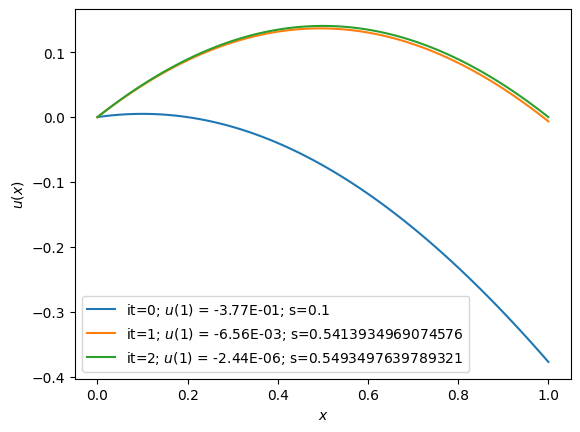

In [3]:
eps = 1e-5  # eps для разностной производной в методе Ньютона
s = 0.1 # начальный "угол" стрельбы
max_step = 0.01 # макс шаг солвера в пристрелке
tol = 1e-5 # точность в пристрелке; когда правый конец траектории попал в ноль (краевое условие) с такой точностью, расчет завершается

it = 0
while True:
    sol = solve_ivp(fun=odefunc, t_span=[0, 1], y0=[0, s], max_step=max_step)
    plt.plot(sol.t, sol.y[0], label=f'{it=}; $u(1)$ = {sol.y[0, -1]:.2E}; {s=}')

    if np.abs(sol.y[0,-1]) < tol:
        break

    it += 1
    sol_eps = solve_ivp(fun=odefunc, t_span=[0, 1], y0=[0, s+eps], max_step=max_step)
    F = (sol_eps.y[0,-1] - sol.y[0,-1]) / eps
    s = s - sol.y[0,-1] / F

plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend()